In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_pickle("cap_df.pkl")
df.head()

,pitch_type,game_date,release_pos_z,player_name,batter,pitcher,events,description,zone,game_type,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,SL,2018-10-28,5.2558,Chris Sale,592518.0,519242.0,strikeout,swinging_strike,13.0,W,...,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Standard,Standard
1,FF,2018-10-28,5.5011,Chris Sale,592518.0,519242.0,NaN,ball,12.0,W,...,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Standard,Standard
2,FF,2018-10-28,5.5353,Chris Sale,592518.0,519242.0,NaN,foul,3.0,W,...,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Standard,Standard
3,CH,2018-10-28,4.9820,Chris Sale,592518.0,519242.0,NaN,swinging_strike,13.0,W,...,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Standard,Standard
4,SL,2018-10-28,5.1633,Chris Sale,571771.0,519242.0,strikeout,swinging_strike,4.0,W,...,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Standard,Standard


In [3]:
df.drop(['release_pos_z', 'pitcher.1', 'fielder_2.1', 'post_away_score', 
        'post_home_score', 'post_bat_score', 'post_fld_score'],
        axis=1, inplace=True)

In [4]:
new_df = df.drop(df.loc[df['pitch_type']=='KN'].index)

In [5]:
new_df = new_df.drop(new_df.loc[new_df['pitch_type']=='EP'].index)

In [6]:
new_df = new_df.drop(new_df.loc[new_df['pitch_type']=='FO'].index)

In [7]:
new_df = new_df.drop(new_df.loc[new_df['pitch_type']=='PO'].index)

In [8]:
new_df = new_df.drop(new_df.loc[new_df['pitch_type']=='SC'].index)

In [9]:
new_df.dropna(subset=['pitch_type'], inplace=True)

In [10]:
new_df.shape

(1467519, 37)

In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467519 entries, 0 to 1474089
Data columns (total 37 columns):
pitch_type               1467519 non-null object
game_date                1467519 non-null datetime64[ns]
player_name              1467519 non-null object
batter                   1467519 non-null float64
pitcher                  1467519 non-null float64
events                   374064 non-null object
description              1467519 non-null object
zone                     1465577 non-null float64
game_type                1467519 non-null object
stand                    1467519 non-null object
p_throws                 1467519 non-null object
home_team                1467519 non-null object
away_team                1467519 non-null object
type                     1467519 non-null object
hit_location             326338 non-null float64
bb_type                  254130 non-null object
balls                    1467519 non-null float64
strikes                  1467519 non-null fl

In [12]:
new_df.describe()

,batter,pitcher,zone,hit_location,balls,strikes,game_year,on_3b,on_2b,on_1b,outs_when_up,inning,fielder_2,game_pk,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score
count,1.467519e+06,1.467519e+06,1.465577e+06,326338.000000,1.467519e+06,1.467519e+06,1.467519e+06,135436.000000,267458.000000,445810.000000,1.467519e+06,1.467519e+06,1.467519e+06,1.467519e+06,1.467519e+06,1.467519e+06,1.467519e+06,1.467519e+06,1.467519e+06,1.467519e+06
mean,5.612416e+05,5.634255e+05,9.178289e+00,5.070920,8.871885e-01,8.965533e-01,2.018504e+03,562664.166647,562157.489168,559703.068877,9.816950e-01,5.022850e+00,5.383683e+05,5.490430e+05,3.930730e+01,2.918545e+00,2.272300e+00,2.429652e+00,2.329280e+00,2.372673e+00
std,7.002104e+04,7.103559e+04,4.196843e+00,2.634815,9.685585e-01,8.266315e-01,4.999808e-01,69341.231270,69811.557538,70310.687184,8.172898e-01,2.685709e+00,6.679746e+04,1.824776e+04,2.328645e+01,1.739292e+00,2.647399e+00,2.703987e+00,2.631075e+00,2.721976e+00
min,1.125260e+05,1.125260e+05,1.000000e+00,1.000000,0.000000e+00,0.000000e+00,2.018000e+03,134181.000000,134181.000000,134181.000000,0.000000e+00,1.000000e+00,4.080450e+05,5.294060e+05,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.164160e+05,5.184890e+05,5.000000e+00,2.000000,0.000000e+00,0.000000e+00,2.018000e+03,516770.000000,516770.000000,514888.000000,0.000000e+00,3.000000e+00,4.650410e+05,5.306500e+05,1.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.722330e+05,5.922220e+05,1.100000e+01,5.000000,1.000000e+00,1.000000e+00,2.019000e+03,572821.000000,572816.000000,572039.000000,1.000000e+00,5.000000e+00,5.438770e+05,5.647580e+05,3.900000e+01,3.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
75%,6.083840e+05,6.086650e+05,1.300000e+01,8.000000,2.000000e+00,2.000000e+00,2.019000e+03,608385.000000,608475.000000,608331.000000,2.000000e+00,7.000000e+00,5.957510e+05,5.662120e+05,5.800000e+01,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
max,6.766060e+05,6.779760e+05,1.400000e+01,9.000000,4.000000e+00,2.000000e+00,2.019000e+03,676606.000000,676606.000000,676606.000000,2.000000e+00,1.900000e+01,6.692570e+05,5.993770e+05,1.480000e+02,2.100000e+01,2.500000e+01,2.400000e+01,2.500000e+01,2.500000e+01


In [13]:
new_df['pitch_type'].value_counts()

FF    527014
SL    254674
CH    157735
FT    142455
CU    124215
SI    115745
FC     88433
KC     35772
FS     21476
Name: pitch_type, dtype: int64

In [14]:
df['game_type'].value_counts()

R    1452974
D       9540
L       6559
W       3795
F       1222
Name: game_type, dtype: int64

In [15]:
df['stand'].value_counts()

R    864367
L    609723
Name: stand, dtype: int64

In [16]:
df['p_throws'].value_counts()

R    1060128
L     413962
Name: p_throws, dtype: int64

In [17]:
df['type'].value_counts()

S    684179
B    534563
X    255348
Name: type, dtype: int64

In [18]:
df['sv_id'].value_counts()

190719_040300    34
190714_190822    15
180829_170752    10
180805_001523    10
180902_011859    10
                 ..
190720_004715     1
190702_025855     1
190523_025430     1
190425_172919     1
190629_203807     1
Name: sv_id, Length: 1367276, dtype: int64

In [19]:
df['game_pk'].value_counts()

564909.0    594
564784.0    571
563409.0    561
529671.0    556
565102.0    547
           ... 
567220.0    191
530912.0    175
565333.0    167
566187.0    157
567286.0    152
Name: game_pk, Length: 4928, dtype: int64

In [20]:
df['if_fielding_alignment'].value_counts()

Standard         1018453
Infield shift     325201
Strategic         124033
Name: if_fielding_alignment, dtype: int64

In [21]:
df['of_fielding_alignment'].value_counts()

Standard                  1343289
Strategic                  123374
4th outfielder               1023
Extreme outfield shift          1
Name: of_fielding_alignment, dtype: int64

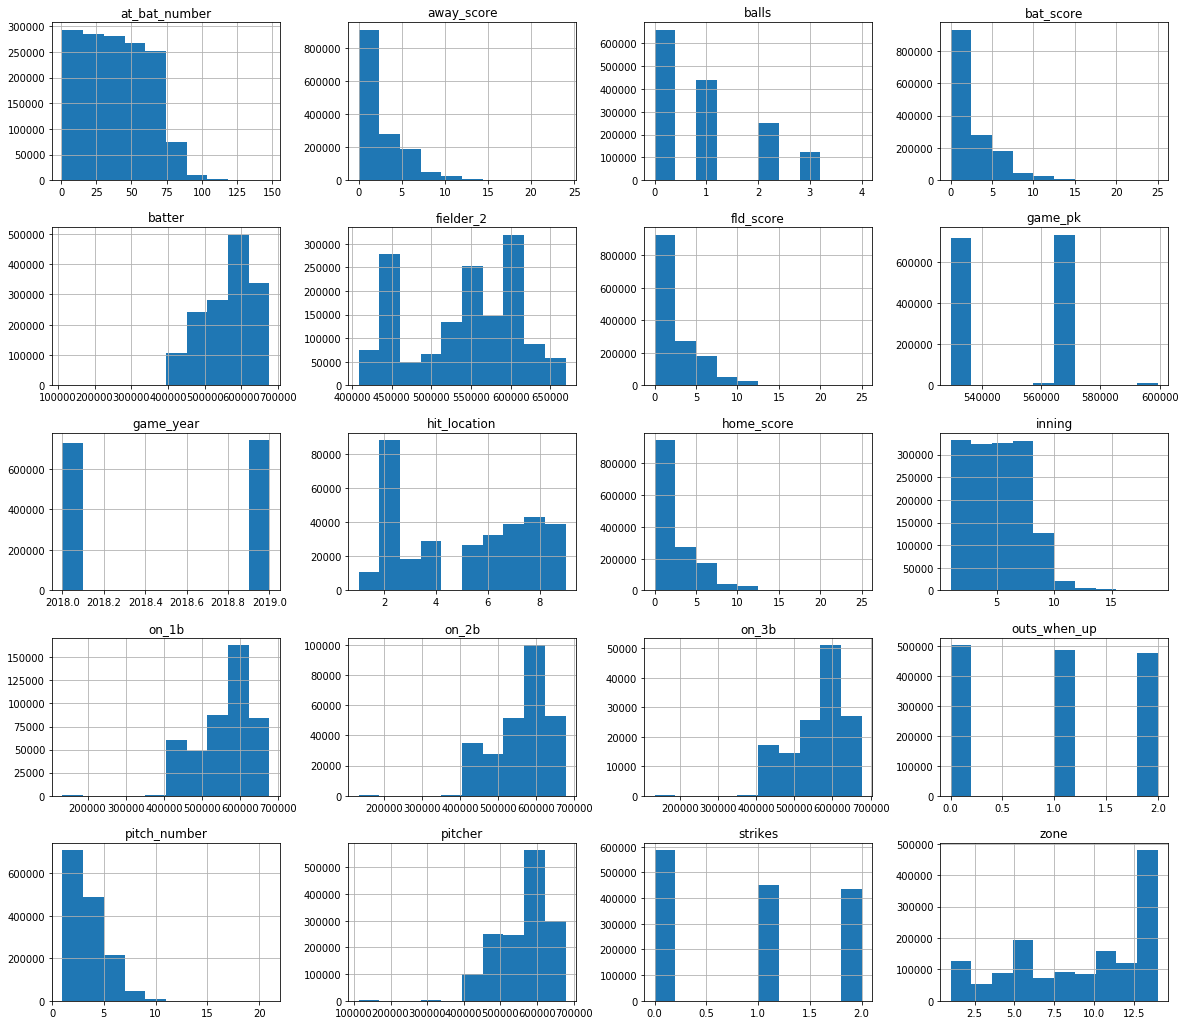

In [22]:
new_df.hist(figsize=(20,18));

In [23]:
new_df.corr()

,batter,pitcher,zone,hit_location,balls,strikes,game_year,on_3b,on_2b,on_1b,outs_when_up,inning,fielder_2,game_pk,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score
batter,1.000000,0.030759,-0.000501,-0.027750,-0.001460,0.007482,0.147772,0.041489,0.031027,0.018743,-0.006257,0.011395,0.028350,0.141491,0.012864,0.003727,0.014395,0.014489,0.012490,0.016320
pitcher,0.030759,1.000000,-0.009172,-0.003279,0.007758,-0.000378,0.120942,0.027418,0.021888,0.030082,-0.000180,0.011175,0.098979,0.110525,0.017099,0.005518,0.026249,0.025176,0.057596,-0.005133
zone,-0.000501,-0.009172,1.000000,-0.244402,-0.057494,0.079626,0.013343,0.000051,0.001686,-0.001600,0.022672,0.003675,0.002199,0.013181,0.004285,0.008071,0.001661,-0.000585,0.005006,-0.003802
hit_location,-0.027750,-0.003279,-0.244402,1.000000,-0.074303,-0.346655,-0.005682,-0.003255,-0.006527,-0.004364,-0.018293,-0.014895,0.007148,-0.007228,-0.011905,-0.227083,0.000456,0.004113,0.010866,-0.005951
balls,-0.001460,0.007758,-0.057494,-0.074303,1.000000,0.383334,0.002650,0.003898,0.007581,-0.008013,0.014593,-0.001729,-0.003021,0.002564,0.000175,0.811618,0.002613,0.001572,0.005796,-0.001499
strikes,0.007482,-0.000378,0.079626,-0.346655,0.383334,1.000000,0.005796,0.001583,-0.000119,-0.003170,0.000774,-0.000429,-0.001125,0.006139,-0.001449,0.792195,-0.001130,-0.000494,-0.007427,0.005589
game_year,0.147772,0.120942,0.013343,-0.005682,0.002650,0.005796,1.000000,0.147716,0.141160,0.153077,0.000191,0.000761,0.131936,0.974829,0.008316,0.005046,0.032304,0.047526,0.040539,0.039445
on_3b,0.041489,0.027418,0.000051,-0.003255,0.003898,0.001583,0.147716,1.000000,-0.000562,0.041129,0.006068,0.015881,0.043737,0.143148,0.016975,0.003289,0.020603,0.007431,0.010315,0.017975
on_2b,0.031027,0.021888,0.001686,-0.006527,0.007581,-0.000119,0.141160,-0.000562,1.000000,0.023383,-0.006285,0.023062,0.030750,0.136019,0.022948,0.003549,0.019001,0.013486,0.012318,0.020241
on_1b,0.018743,0.030082,-0.001600,-0.004364,-0.008013,-0.003170,0.153077,0.041129,0.023383,1.000000,-0.002757,0.031409,0.033351,0.147783,0.032549,-0.006036,0.022076,0.028696,0.018825,0.031965


In [24]:
# function to bin pitch types into binary classes

def bin_pitches(single_pitch):
    
    offspeed = ['CH', 'FS']
    breaking = ['SL', 'CU', 'KC']
    
    if single_pitch in offspeed:
        return 0
    elif single_pitch in breaking:
        return 1
    else:
        return 2  

In [25]:
# apply function to dataframe

new_df['bin_pitches'] = new_df.pitch_type.apply(bin_pitches)

In [26]:
new_df['bin_pitches'].value_counts()

2    873647
1    414661
0    179211
Name: bin_pitches, dtype: int64

In [27]:
new_df["count"] = new_df["balls"].astype(str) + '-' + df["strikes"].astype(str)

In [28]:
new_df.head()

,pitch_type,game_date,player_name,batter,pitcher,events,description,zone,game_type,stand,...,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment,bin_pitches,count
0,SL,2018-10-28,Chris Sale,592518.0,519242.0,strikeout,swinging_strike,13.0,W,R,...,4.0,Slider,1.0,5.0,1.0,5.0,Standard,Standard,1,1.0-2.0
1,FF,2018-10-28,Chris Sale,592518.0,519242.0,NaN,ball,12.0,W,R,...,3.0,4-Seam Fastball,1.0,5.0,1.0,5.0,Standard,Standard,2,0.0-2.0
2,FF,2018-10-28,Chris Sale,592518.0,519242.0,NaN,foul,3.0,W,R,...,2.0,4-Seam Fastball,1.0,5.0,1.0,5.0,Standard,Standard,2,0.0-1.0
3,CH,2018-10-28,Chris Sale,592518.0,519242.0,NaN,swinging_strike,13.0,W,R,...,1.0,Changeup,1.0,5.0,1.0,5.0,Standard,Standard,0,0.0-0.0
4,SL,2018-10-28,Chris Sale,571771.0,519242.0,strikeout,swinging_strike,4.0,W,R,...,7.0,Slider,1.0,5.0,1.0,5.0,Standard,Standard,1,3.0-2.0


In [29]:
new_df = new_df[new_df.balls != 4.0]

In [30]:
new_df['count'].value_counts()

0.0-0.0    374520
0.0-1.0    187910
1.0-1.0    150275
1.0-0.0    145609
1.0-2.0    141060
2.0-2.0    121980
0.0-2.0     96429
2.0-1.0     78408
3.0-2.0     73862
2.0-0.0     49747
3.0-1.0     32437
3.0-0.0     15273
Name: count, dtype: int64

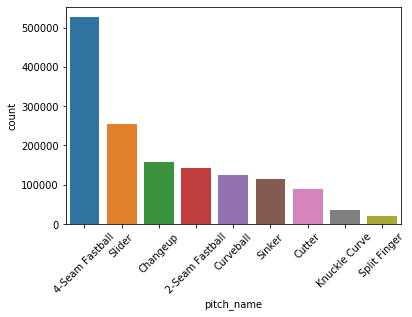

In [31]:
sns.countplot(data = new_df, x = 'pitch_name', order= new_df['pitch_name'].value_counts().index)
plt.xticks(rotation=45);

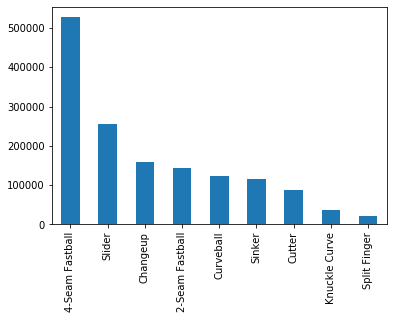

In [32]:
new_df['pitch_name'].value_counts().plot(kind="bar")

plt.show();

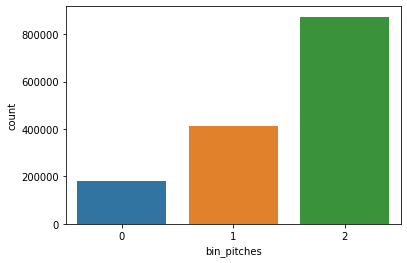

In [90]:
bin_pitch_count = sns.countplot(data = new_df, x = 'bin_pitches')

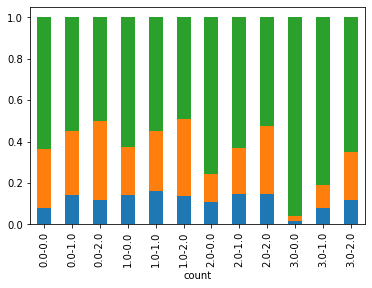

In [91]:
bin_plot = bin_count_plot.div(bin_count_plot.sum(axis=1), axis=0)

bin_plot.plot(kind='bar', stacked=True, legend=False);

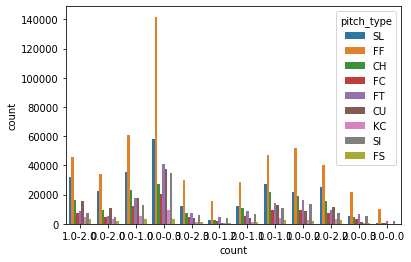

In [36]:
sns.countplot(data=new_df, x='count', hue='pitch_type')

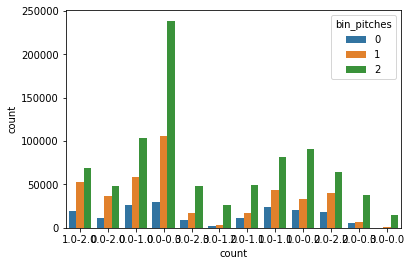

In [37]:
sns.countplot(data=new_df, x='count', hue='bin_pitches');

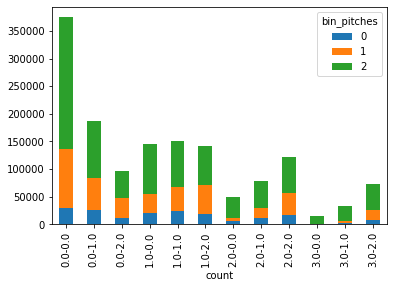

In [38]:
bin_count_plot = new_df.groupby(['bin_pitches', 'count']).size().reset_index().pivot(columns='bin_pitches', 
                            index='count', values=0)
bin_count_plot.plot(kind='bar', stacked=True);

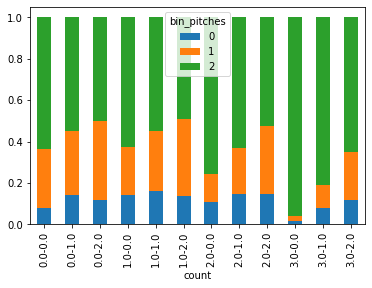

In [39]:
bin_plot = bin_count_plot.div(bin_count_plot.sum(axis=1), axis=0)

bin_plot.plot(kind='bar', stacked=True);

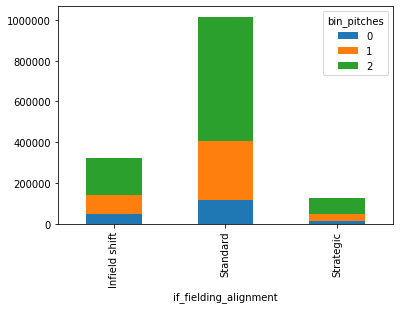

In [79]:
shift_count_plot = new_df.groupby(['bin_pitches', 'if_fielding_alignment']).size().reset_index().pivot(columns='bin_pitches', 
                            index='if_fielding_alignment', values=0)
shift_count_plot.plot(kind='bar', stacked=True);

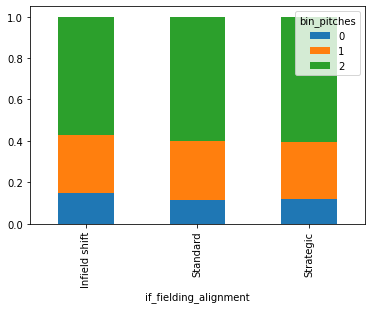

In [80]:
shift_plot = shift_count_plot.div(shift_count_plot.sum(axis=1), axis=0)

shift_plot.plot(kind='bar', stacked=True);

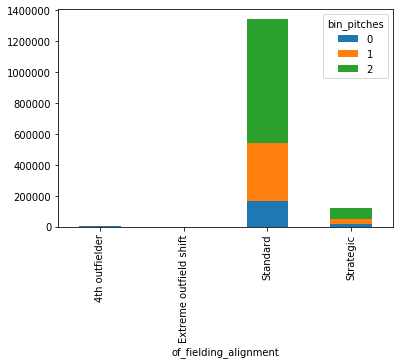

In [41]:
shift_plot = new_df.groupby(['bin_pitches', 'of_fielding_alignment']).size().reset_index().pivot(columns='bin_pitches', 
                            index='of_fielding_alignment', values=0)
shift_plot.plot(kind='bar', stacked=True);

In [42]:
new_df['player_name'].value_counts()

Justin Verlander    7599
Gerrit Cole         7357
Patrick Corbin      6859
Max Scherzer        6766
Zack Greinke        6612
                    ... 
Max Stassi             5
Ryan LaMarre           5
Jose Rondon            4
Phillip Ervin          3
Anthony Rizzo          2
Name: player_name, Length: 1038, dtype: int64

In [43]:
# new_df.groupby(new_df['player_name']='Chris Sale')

In [44]:
sale_df = new_df[new_df['player_name']=='Chris Sale'].groupby(['pitch_type']).count()

In [45]:
sale_df.reset_index()

,pitch_type,game_date,player_name,batter,pitcher,events,description,zone,game_type,stand,...,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment,bin_pitches,count
0,CH,863,863,863,863,191,863,863,863,863,...,863,863,863,863,863,863,863,863,863,863
1,FF,1976,1976,1976,1976,508,1976,1976,1976,1976,...,1976,1976,1976,1976,1976,1976,1976,1976,1976,1976
2,FT,523,523,523,523,101,523,523,523,523,...,523,523,523,523,523,523,522,522,523,523
3,SL,1921,1921,1921,1921,498,1921,1921,1921,1921,...,1921,1921,1921,1921,1921,1921,1921,1921,1921,1921


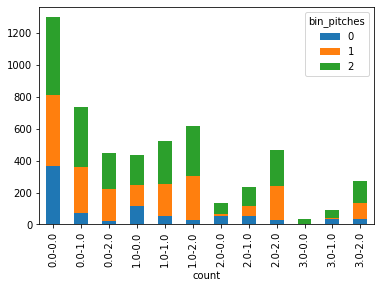

In [46]:
sale_count_plot = new_df[new_df['player_name']=='Chris Sale'].groupby(['bin_pitches', 'count']).size().reset_index().pivot(columns='bin_pitches', 
                            index='count', values=0)
sale_count_plot.plot(kind='bar', stacked=True);

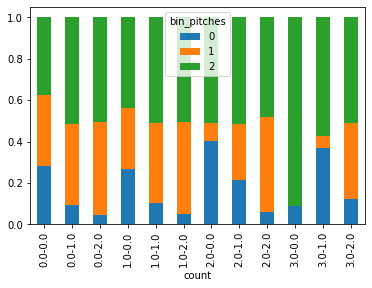

In [78]:
sale_plot = sale_count_plot.div(sale_count_plot.sum(axis=1), axis=0)

sale_plot.plot(kind='bar', stacked=True);

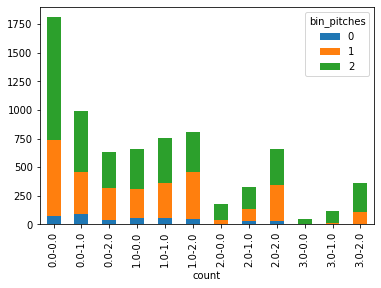

In [47]:
cole_count_plot = new_df[new_df['player_name']=='Gerrit Cole'].groupby(['bin_pitches', 'count']).size().reset_index().pivot(columns='bin_pitches', 
                            index='count', values=0)
cole_count_plot.plot(kind='bar', stacked=True);

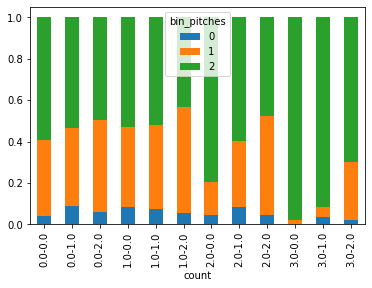

In [77]:
cole_plot = cole_count_plot.div(cole_count_plot.sum(axis=1), axis=0)

cole_plot.plot(kind='bar', stacked=True);

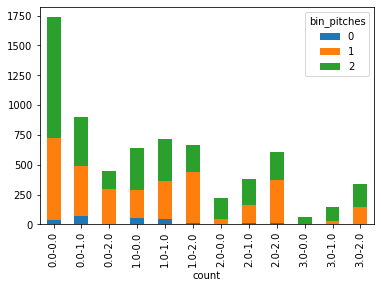

In [48]:
corbin_count_plot = new_df[new_df['player_name']=='Patrick Corbin'].groupby(['bin_pitches', 'count']).size().reset_index().pivot(columns='bin_pitches', 
                            index='count', values=0)
corbin_count_plot.plot(kind='bar', stacked=True);

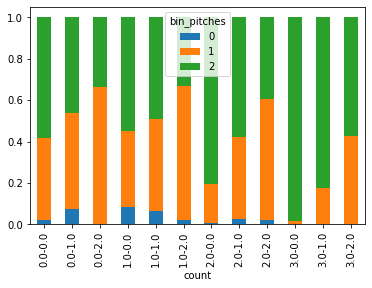

In [49]:
corbin_plot = corbin_count_plot.div(corbin_count_plot.sum(axis=1), axis=0)

corbin_plot.plot(kind='bar', stacked=True);

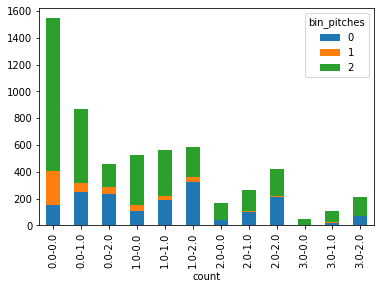

In [50]:
hendricks_count_plot = new_df[new_df['player_name']=='Kyle Hendricks'].groupby(['bin_pitches', 'count']).size().reset_index().pivot(columns='bin_pitches', 
                            index='count', values=0)
hendricks_count_plot.plot(kind='bar', stacked=True);

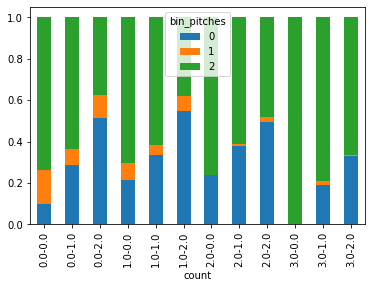

In [51]:
hendricks_plot = hendricks_count_plot.div(hendricks_count_plot.sum(axis=1), axis=0)

hendricks_plot.plot(kind='bar', stacked=True);

In [85]:
new_df[new_df['player_name']=='Lance McCullers Jr.']

,pitch_type,game_date,player_name,batter,pitcher,events,description,zone,game_type,stand,...,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment,bin_pitches,count,game_pitcher_id,prev_pitch_type,prev_pitch_bin,platoon
2796,KC,2018-10-17,Lance McCullers Jr.,593428.0,621121.0,field_out,hit_into_play,8.0,L,R,...,8.0,5.0,Standard,Standard,1,2.0-2.0,563396.0_621121.0,NaN,NaN,0
2797,FT,2018-10-17,Lance McCullers Jr.,593428.0,621121.0,NaN,called_strike,6.0,L,R,...,8.0,5.0,Standard,Standard,2,2.0-1.0,563396.0_621121.0,KC,1.0,0
2798,FT,2018-10-17,Lance McCullers Jr.,593428.0,621121.0,NaN,foul,11.0,L,R,...,8.0,5.0,Standard,Standard,2,2.0-0.0,563396.0_621121.0,FT,2.0,0
2799,KC,2018-10-17,Lance McCullers Jr.,593428.0,621121.0,NaN,ball,11.0,L,R,...,8.0,5.0,Standard,Standard,1,1.0-0.0,563396.0_621121.0,FT,2.0,0
2800,FT,2018-10-17,Lance McCullers Jr.,593428.0,621121.0,NaN,blocked_ball,14.0,L,R,...,8.0,5.0,Standard,Standard,2,0.0-0.0,563396.0_621121.0,KC,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722129,FT,2018-03-31,Lance McCullers Jr.,134181.0,621121.0,NaN,ball,14.0,R,R,...,0.0,0.0,Standard,Standard,2,0.0-0.0,529435.0_621121.0,KC,1.0,0
722130,KC,2018-03-31,Lance McCullers Jr.,608336.0,621121.0,field_out,hit_into_play,14.0,R,L,...,0.0,0.0,Infield shift,Strategic,1,0.0-2.0,529435.0_621121.0,FT,2.0,1
722131,KC,2018-03-31,Lance McCullers Jr.,608336.0,621121.0,NaN,swinging_strike,14.0,R,L,...,0.0,0.0,Infield shift,Strategic,1,0.0-1.0,529435.0_621121.0,KC,1.0,1
722132,FF,2018-03-31,Lance McCullers Jr.,608336.0,621121.0,NaN,called_strike,8.0,R,L,...,0.0,0.0,Infield shift,Strategic,2,0.0-0.0,529435.0_621121.0,KC,1.0,1


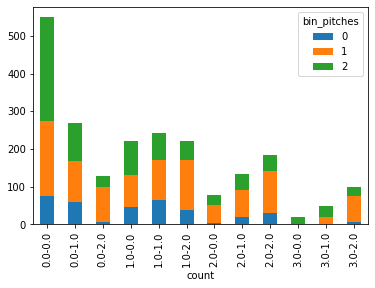

In [86]:
mccullers_count_plot = new_df[new_df['player_name']=='Lance McCullers Jr.'].groupby(['bin_pitches', 'count']).size().reset_index().pivot(columns='bin_pitches', 
                            index='count', values=0)
mccullers_count_plot.plot(kind='bar', stacked=True);

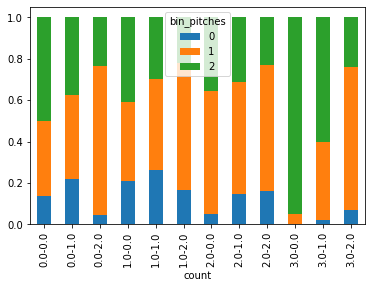

In [87]:
mccullers_plot = mccullers_count_plot.div(mccullers_count_plot.sum(axis=1), axis=0)

mccullers_plot.plot(kind='bar', stacked=True);

In [52]:
new_df['game_pitcher_id'] = new_df['game_pk'].astype(str) + '_' + new_df['pitcher'].astype(str)

In [53]:
new_df.drop('game_pk', axis=1, inplace=True)

In [54]:
new_df['prev_pitch_type'] = new_df.groupby('game_pitcher_id')['pitch_type'].apply(lambda x: x.shift(1))

In [55]:
new_df['prev_pitch_bin'] = new_df.groupby('game_pitcher_id')['bin_pitches'].apply(lambda x: x.shift(1))

In [56]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467510 entries, 0 to 1474089
Data columns (total 41 columns):
pitch_type               1467510 non-null object
game_date                1467510 non-null datetime64[ns]
player_name              1467510 non-null object
batter                   1467510 non-null float64
pitcher                  1467510 non-null float64
events                   374061 non-null object
description              1467510 non-null object
zone                     1465568 non-null float64
game_type                1467510 non-null object
stand                    1467510 non-null object
p_throws                 1467510 non-null object
home_team                1467510 non-null object
away_team                1467510 non-null object
type                     1467510 non-null object
hit_location             326335 non-null float64
bb_type                  254128 non-null object
balls                    1467510 non-null float64
strikes                  1467510 non-null fl

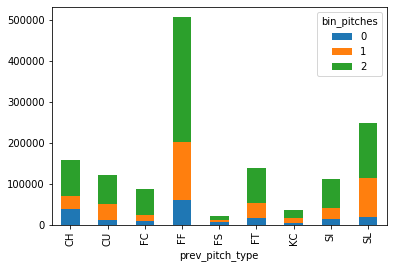

In [57]:
count_plot = new_df.groupby(['bin_pitches', 'prev_pitch_type']).size().reset_index().pivot(columns='bin_pitches', 
                            index='prev_pitch_type', values=0)
count_plot.plot(kind='bar', stacked=True);

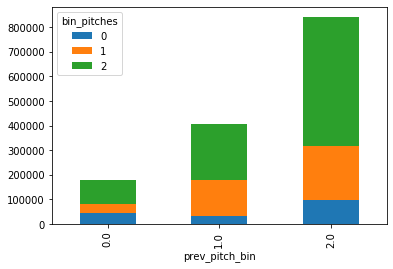

In [58]:
prev_count_plot = new_df.groupby(['bin_pitches', 'prev_pitch_bin']).size().reset_index().pivot(columns='bin_pitches', 
                            index='prev_pitch_bin', values=0)
prev_count_plot.plot(kind='bar', stacked=True);

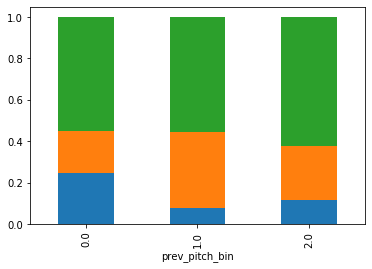

In [96]:
prev_plot = prev_count_plot.div(prev_count_plot.sum(axis=1), axis=0)

prev_plot.plot(kind='bar', stacked=True, legend=False);

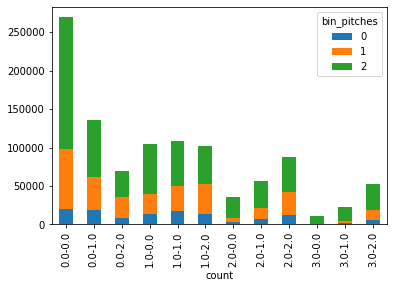

In [60]:
right_count_plot = new_df[new_df['p_throws']=='R'].groupby(['bin_pitches', 'count']).size().reset_index().pivot(columns='bin_pitches', 
                            index='count', values=0)
right_count_plot.plot(kind='bar', stacked=True);

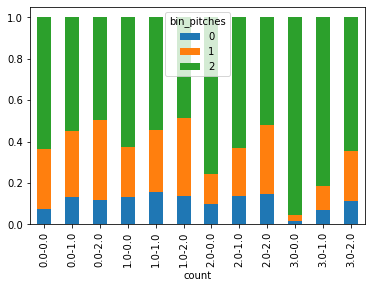

In [61]:
right_plot = right_count_plot.div(right_count_plot.sum(axis=1), axis=0)

right_plot.plot(kind='bar', stacked=True);

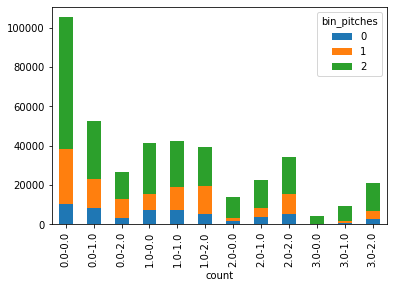

In [62]:
left_count_plot = new_df[new_df['p_throws']=='L'].groupby(['bin_pitches', 'count']).size().reset_index().pivot(columns='bin_pitches', 
                            index='count', values=0)
left_count_plot.plot(kind='bar', stacked=True);

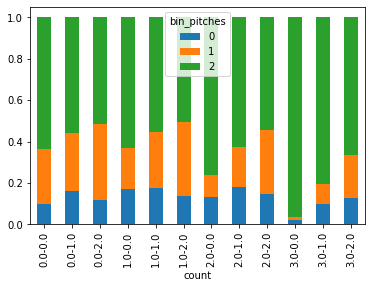

In [63]:
left_plot = left_count_plot.div(left_count_plot.sum(axis=1), axis=0)

left_plot.plot(kind='bar', stacked=True)

In [64]:
new_df['platoon'] = new_df['p_throws'] != new_df['stand']

In [65]:
new_df['platoon'].value_counts()

True     788398
False    679112
Name: platoon, dtype: int64

In [66]:
new_df['platoon'] = new_df['platoon'].astype(int)

In [67]:
new_df['platoon'].value_counts()

1    788398
0    679112
Name: platoon, dtype: int64

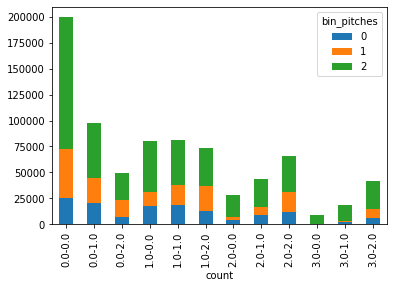

In [68]:
platoon_count_plot = new_df[new_df['platoon']==1].groupby(['bin_pitches', 'count']).size().reset_index().pivot(columns='bin_pitches', 
                            index='count', values=0)
platoon_count_plot.plot(kind='bar', stacked=True);

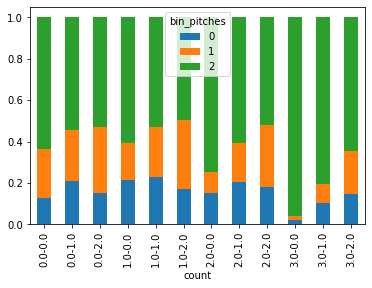

In [69]:
platoon_plot = platoon_count_plot.div(platoon_count_plot.sum(axis=1), axis=0)

platoon_plot.plot(kind='bar', stacked=True);

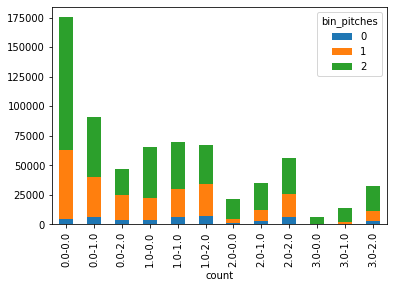

In [70]:
same_count_plot = new_df[new_df['platoon']==0].groupby(['bin_pitches', 'count']).size().reset_index().pivot(columns='bin_pitches', 
                            index='count', values=0)
same_count_plot.plot(kind='bar', stacked=True);

In [72]:
res = same_count_plot.div(same_count_plot.sum(axis=1), axis=0)

print(res.reset_index())

bin_pitches    count         0         1         2
0            0.0-0.0  0.028231  0.329679  0.642090
1            0.0-1.0  0.066032  0.379550  0.554419
2            0.0-2.0  0.084651  0.438554  0.476795
3            1.0-0.0  0.056863  0.292651  0.650487
4            1.0-1.0  0.084530  0.348211  0.567259
5            1.0-2.0  0.100337  0.414819  0.484844
6            2.0-0.0  0.050373  0.173787  0.775840
7            2.0-1.0  0.077283  0.269342  0.653375
8            2.0-2.0  0.107694  0.359171  0.533135
9            3.0-0.0  0.009419  0.032088  0.958493
10           3.0-1.0  0.041949  0.137790  0.820261
11           3.0-2.0  0.079311  0.263208  0.657481


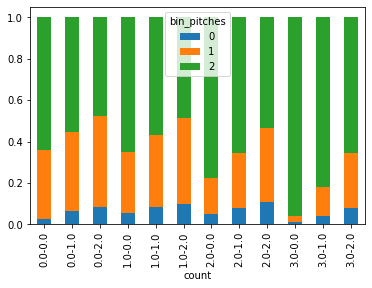

In [73]:
res.plot(kind='bar', stacked=True);

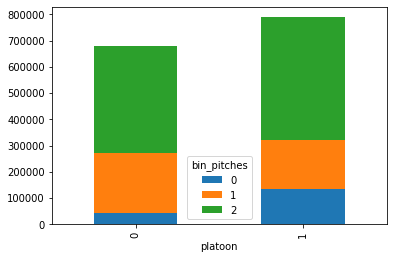

In [92]:
platoon_bin = new_df.groupby(['bin_pitches', 'platoon']).size().reset_index().pivot(columns='bin_pitches', 
                            index='platoon', values=0)
platoon_bin.plot(kind='bar', stacked=True);

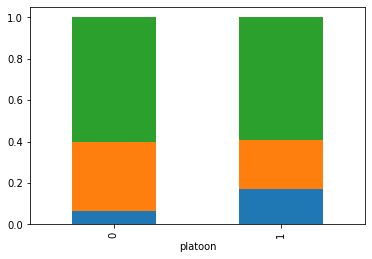

In [95]:
platoon_bin_plot = platoon_bin.div(platoon_bin.sum(axis=1), axis=0)

platoon_bin_plot.plot(kind='bar', stacked=True, legend=False);

In [74]:
new_df.head()

,pitch_type,game_date,player_name,batter,pitcher,events,description,zone,game_type,stand,...,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment,bin_pitches,count,game_pitcher_id,prev_pitch_type,prev_pitch_bin,platoon
0,SL,2018-10-28,Chris Sale,592518.0,519242.0,strikeout,swinging_strike,13.0,W,R,...,1.0,5.0,Standard,Standard,1,1.0-2.0,563411.0_519242.0,NaN,NaN,1
1,FF,2018-10-28,Chris Sale,592518.0,519242.0,NaN,ball,12.0,W,R,...,1.0,5.0,Standard,Standard,2,0.0-2.0,563411.0_519242.0,SL,1.0,1
2,FF,2018-10-28,Chris Sale,592518.0,519242.0,NaN,foul,3.0,W,R,...,1.0,5.0,Standard,Standard,2,0.0-1.0,563411.0_519242.0,FF,2.0,1
3,CH,2018-10-28,Chris Sale,592518.0,519242.0,NaN,swinging_strike,13.0,W,R,...,1.0,5.0,Standard,Standard,0,0.0-0.0,563411.0_519242.0,FF,2.0,1
4,SL,2018-10-28,Chris Sale,571771.0,519242.0,strikeout,swinging_strike,4.0,W,R,...,1.0,5.0,Standard,Standard,1,3.0-2.0,563411.0_519242.0,CH,0.0,1


In [75]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467510 entries, 0 to 1474089
Data columns (total 42 columns):
pitch_type               1467510 non-null object
game_date                1467510 non-null datetime64[ns]
player_name              1467510 non-null object
batter                   1467510 non-null float64
pitcher                  1467510 non-null float64
events                   374061 non-null object
description              1467510 non-null object
zone                     1465568 non-null float64
game_type                1467510 non-null object
stand                    1467510 non-null object
p_throws                 1467510 non-null object
home_team                1467510 non-null object
away_team                1467510 non-null object
type                     1467510 non-null object
hit_location             326335 non-null float64
bb_type                  254128 non-null object
balls                    1467510 non-null float64
strikes                  1467510 non-null fl

In [ ]:
# new_df.to_pickle("model_df.pkl")